# SMS Spam Detection

# CampusX

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\akshat.agrawal\Machine Learning\SMS Spam Classifier\SMS Spam Classifier.csv' , encoding='latin-1')

# Encoding to use for UTF when reading/writing (ex. ‘utf-8’).

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

# Return a random sample of items from an axis of object.

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4784,spam,Urgent -call 09066649731from Landline. Your co...,NaN,NaN,NaN
2413,ham,Lol please do. Actually send a pic of yourself...,NaN,NaN,NaN
1070,ham,"alright, I'll make sure the car is back tonight",NaN,NaN,NaN
2798,ham,I've told him that i've returned it. That shou...,NaN,NaN,NaN
799,ham,"\Gimme a few\"" was &lt;#&gt; minutes ago""",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Steps in the upcoming Project

1. Data cleaning

2. EDA

3. Text Preprocessing (Vectorization, stop words, etc...)

4. Model Building

5. Model Evaluation

6. Improvements if needed

7. Website

8. Deploy the website 

# Data Cleaning
- check and handle null values
- check and handle duplicates

In [6]:
# removing unnecessary columns

df.isnull().sum() # in last 3 columns we see that there are many nulls, so let's remove them

df.drop(columns = ['Unnamed: 2' , 'Unnamed: 3', 'Unnamed: 4'] , inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming the columns

df.rename(columns = {'v1':'Target' , 'v2':'Text'} , inplace =True)

In [9]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.Target.value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [11]:
df['Target'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
df['Target'].nunique()

2

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words. 

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

To convert categorical data to numerical, we can try these approaches in sklearn:

- Label Encoding
- Label Binarizer
- OneHot Encoding
Now, for our problem, we can use LabelEncoder. But there is a catch. In other sklearn models, we can declare it once and then use it to fit and then transform on a number of columns.

In [14]:
df['Target'] = encoder.fit_transform(df['Target'])

In [15]:
df.head() # now ham = 0 and spam = 1

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# checking missing values

df.isnull().sum()

Target    0
Text      0
dtype: int64

In [17]:
# check duplicated

#df.duplicated().value_counts() # 403 duplicated values
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep = 'first')


# keep{‘first’, ‘last’, False}, default ‘first’
# Determines which duplicates (if any) to keep. -
# first : Drop duplicates except for the first occurrence. - 
# last : Drop duplicates except for the last occurrence. - 
# False : Drop all duplicates.

In [19]:
df.duplicated().sum() # now we see that there are no duplicates left

0

In [20]:
df.shape

(5169, 2)

# EDA

In [21]:
df['Target'].value_counts() 
# 4516 ham and 653 spams

0    4516
1     653
Name: Target, dtype: int64

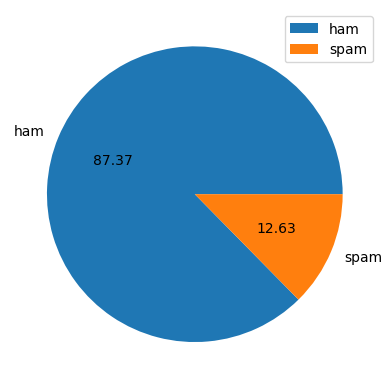

In [22]:
# representing the same above thing using pie chart

import matplotlib.pyplot as plt
mylabels = ['ham' , 'spam']
plt.pie(df['Target'].value_counts() , labels = mylabels, autopct = "%0.2f")
plt.legend()
plt.show()

# we can clearly see that data is imbalanced

87 % ham and only 12% spams

# Let's determine how many alphabets, how many words, how many sentences are used in the input dataset

In [23]:
#   ! pip install nltk

import nltk 

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akshat.agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# adding a new column to the dataframe for number of characters in every sentence

df['num_of_characters'] = df['Text'].apply(len) # telling no of characters used in every sentences

In [25]:
df.head()

,Target,Text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# number of words in every sentence

df['Text'].apply(lambda x:nltk.word_tokenize(x)) # word by word breakdown of each sentence

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [27]:
df['num_of_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,Target,Text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
# number of sentences
# it will breakdown by sentences in each sms

# df['Text'].apply(lambda x: nltk.sent_tokenize(x))

df['num_of_sentences'] =df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,Text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_of_characters' , 'num_of_words', 'num_of_sentences']].describe()


# we can see that there's a sms in which 910 characters are used at most and 
# in a sms 220 words are used at max
# around 78 characters are used in sms on an average and 18 words and around 2 sentences per sms on an avg

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


# we can also see above description for ham and spam msgs separately

In [32]:
# for ham SMS

df[df['Target'] == 0][['num_of_characters' , 'num_of_words' , 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# for spam SMS

df[df['Target'] == 1][['num_of_characters' , 'num_of_words' , 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


We can see that num of character, words and sentences are much more in SPAM msgs than HAM SMS

<AxesSubplot:xlabel='num_of_characters', ylabel='Count'>

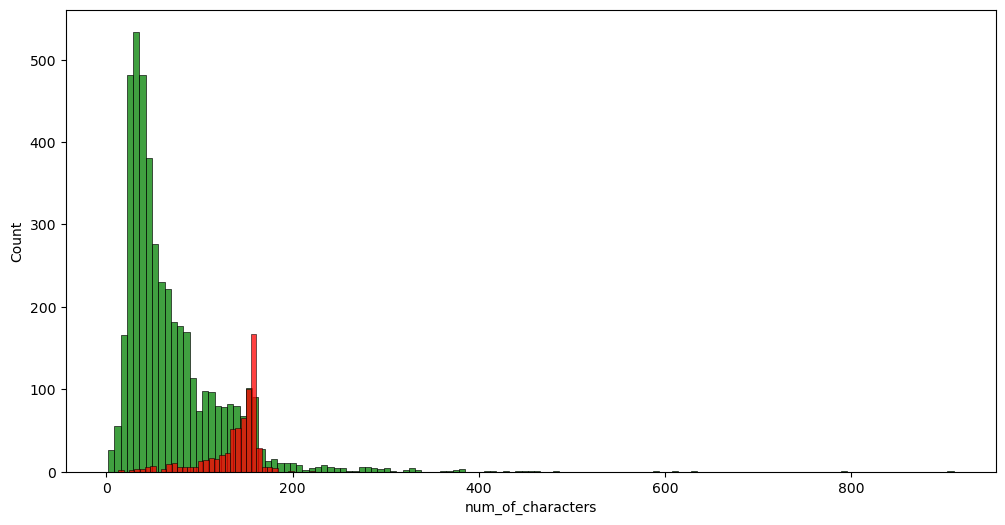

In [34]:
# Seeing above thing using histplot


import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_of_characters'], color = 'g') # num of characters for ham SMS
sns.histplot(df[df['Target'] == 1]['num_of_characters'], color = 'r') # num of characters for SPAM SMS

# we see that number of characters used in spam msgs are more than in ham msgs

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

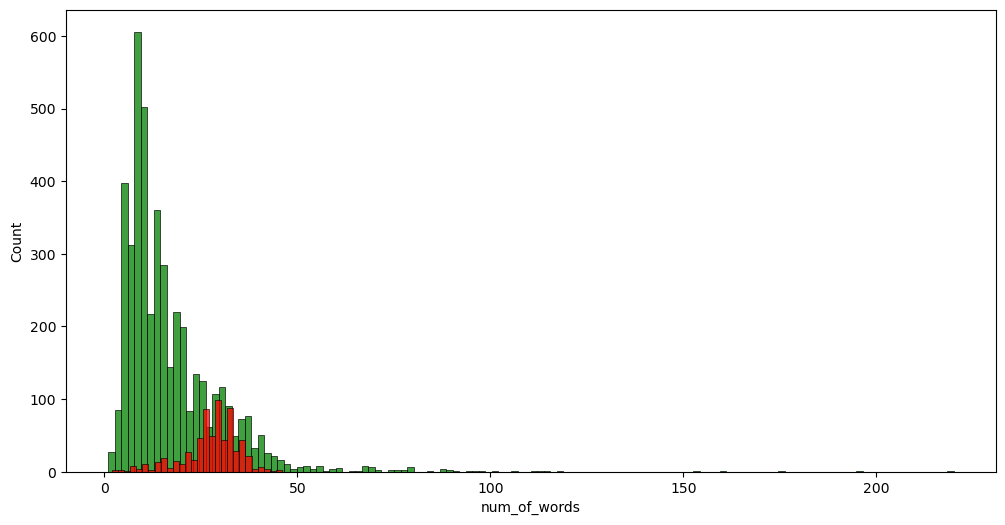

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_of_words'], color = 'g') # num of wordds for ham SMS
sns.histplot(df[df['Target'] == 1]['num_of_words'], color = 'r') # num of words for SPAM SMS

<AxesSubplot:xlabel='num_of_sentences', ylabel='Count'>

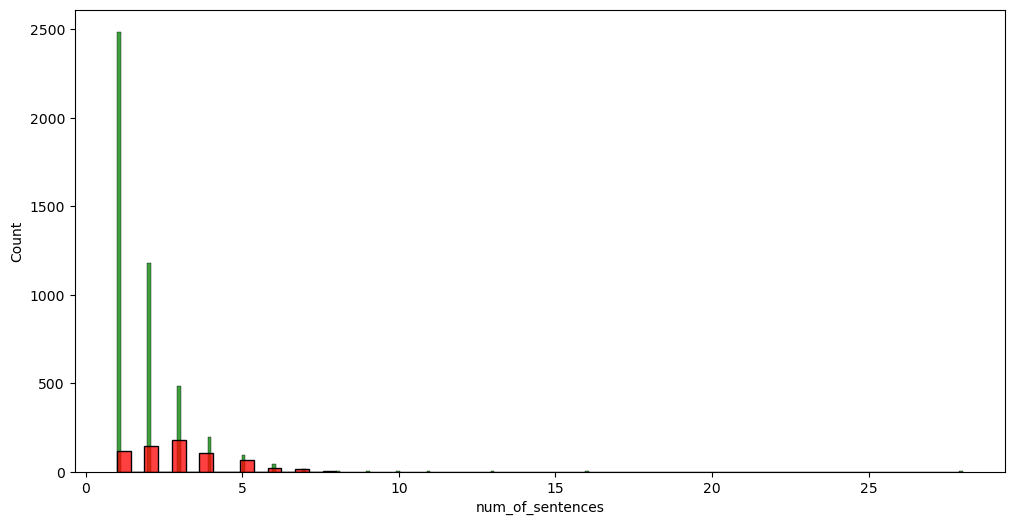

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_of_sentences'], color = 'g') # num of sentences for ham SMS
sns.histplot(df[df['Target'] == 1]['num_of_sentences'], color = 'r') # num of sentences for SPAM SMS

# Let's check the coorelation between number of charactes, words and sentences

In [37]:
df.corr()

,Target,num_of_characters,num_of_words,num_of_sentences
Target,1.000000,0.384717,0.262984,0.284901
num_of_characters,0.384717,1.000000,0.965770,0.638143
num_of_words,0.262984,0.965770,1.000000,0.684541
num_of_sentences,0.284901,0.638143,0.684541,1.000000


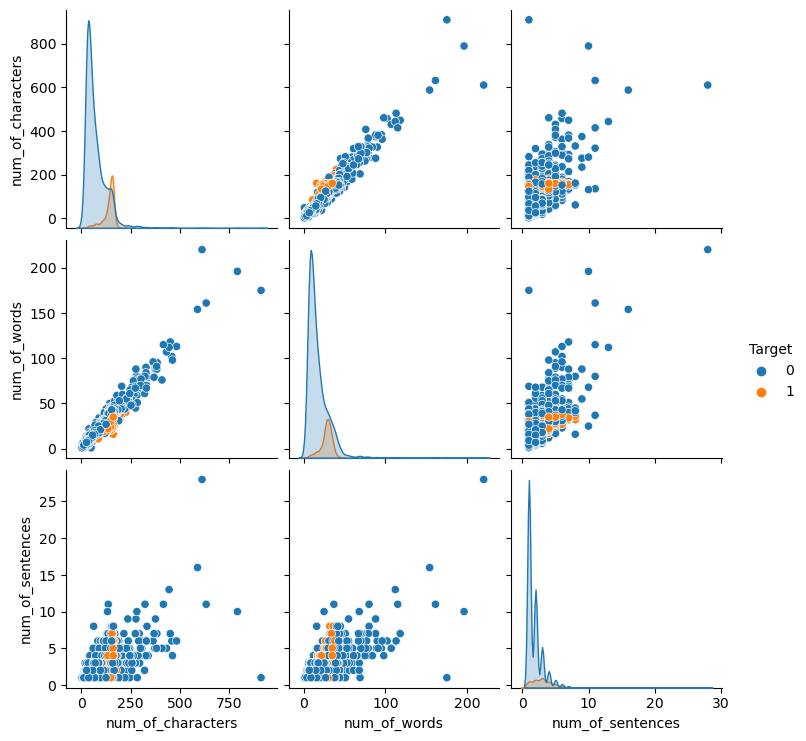

In [38]:
sns.pairplot(df, hue = 'Target')

<AxesSubplot:>

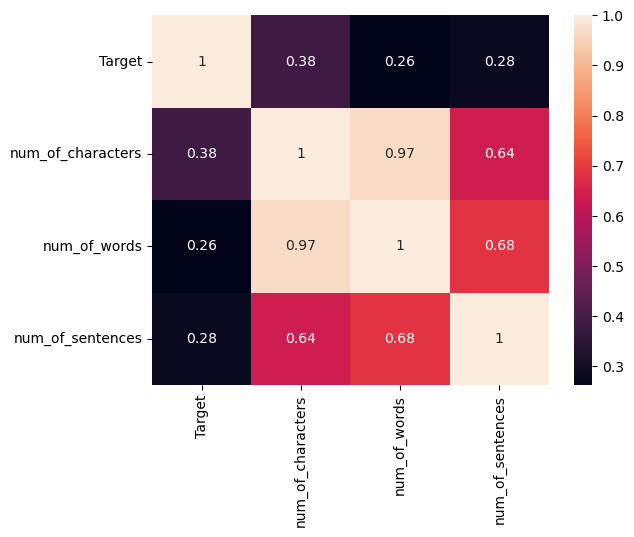

In [39]:
sns.heatmap(df.corr(), annot = True)

# we see that num_of_characters has strong correlation with Target so we'll keep it to train the model as all 3 columns have very 
# strong corelation among them (feature selection)

# Feature Selection

Features with high correlation among them are more linearly dependent and hence have almost the same effect on the dependent 
variable.
So, when two features have high correlation, we can drop one of the two features.

# Data Preprocessing
The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stop words.
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore

- Lower Case

- Tokenization (breaking into words)

- Removing  special characters (keeping only alphabetical or alphanumerics)

- Removing stop words and punctuation marks (is, are, of, the, etc) i.e having no contribution in the meaning of sentence
Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence

- Stemming (converting similar words into one like dance, dancing, danced into one word dance)

Creating a function to do all the above steps into it.

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshat.agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))  # to see the list of stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
import string
string.punctuation # to see the list of all punctuation marks

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

print(ps.stem("walking") ) # ing will be removed
print(ps.stem("dancing"))

walk
danc


In [44]:
def transform_text(text):
    text = text.lower()  # lowercase
    text = nltk.word_tokenize(text) # tokenization - after this text is converted into list
    y = []
    for i in text:
        if i.isalnum(): # checking each word for alphanumerics
            y.append(i) # storing alphabteical words in "y"
            
    text =y[:] # copying the string y to text
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # checking for stopwords and punctuation
            y.append(i)# stroing all words excepts stopwords and punctuation marks
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) # applying stemming 
    
    return " ".join(y)

In [45]:
transform_text("HI#  !how Ar#%e YO@*U") 

'hi ar e yo u'

In [46]:
transform_text('Hi! How are you, Akshat? ') # (how, are, you) are stopwords, so removed

'hi akshat'

In [47]:
transform_text("Hi! I am loving ML tutorial, What about you, Abhay?"
               "How do you like it")

'hi love ml tutori abhay like'

In [48]:
df.head()

,Target,Text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
# now applying the above function on the text data in the dataset

df['transformed_data'] = df['Text'].apply(transform_text)

In [50]:
df.head()

,Target,Text,num_of_characters,num_of_words,num_of_sentences,transformed_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# wordcloud 
# to check the frequency of words in ham and spam sms

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud

In [51]:
# pip install wordcloud
from wordcloud import WordCloud

In [52]:
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white') #ham_wc

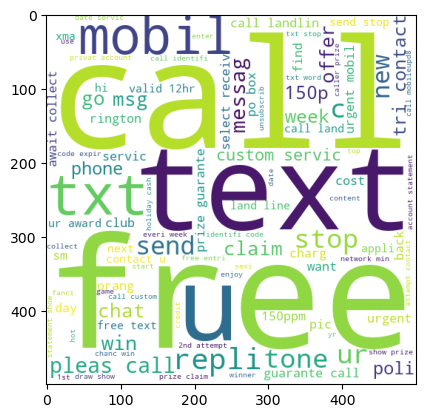

In [53]:
# let's check for SPAM sms first
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_data'].str.cat(sep = " "))

plt.imshow(spam_wc)

# we see that in sapm msgs words like call, reply, free, are frequently used

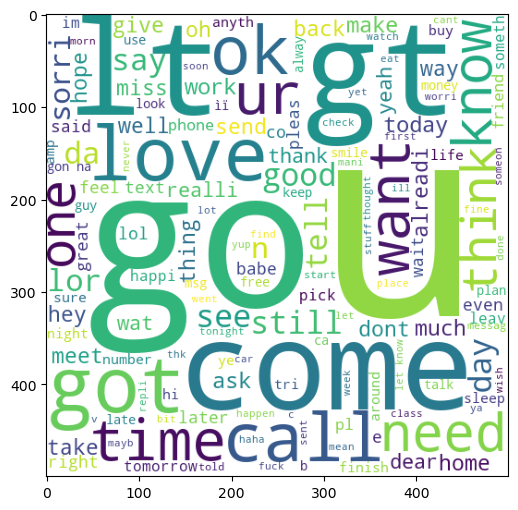

In [54]:
# let's check for ham SMS now
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_data'].str.cat(sep = " "))
plt.figure(figsize=(8,6))
plt.imshow(ham_wc)

# Alternative to check top 30 words in SPAM msgs


In [55]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_data'].tolist():# list of string (every MSG is an item)
    for word in msg.split():  # to separate all the words 
        spam_corpus.append(word)


In [56]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [57]:
len(spam_corpus)

9939

C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


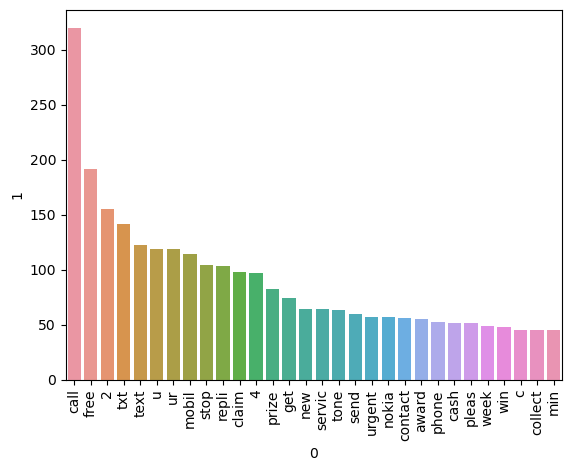

In [58]:
from collections import Counter
# Counter(spam_corpus) # creates a dictionary of information every word in spam_corpus

# Counter(spam_corpus).most_common(30) # to see the top 30 words used in spam msgs

# pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation = 'vertical')

plt.show()

In [59]:
# for HAM SMS

ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_data'].tolist():# list of string (every MSG is an item)
    for word in msg.split():  # to separate all the words 
        ham_corpus.append(word)
        

ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


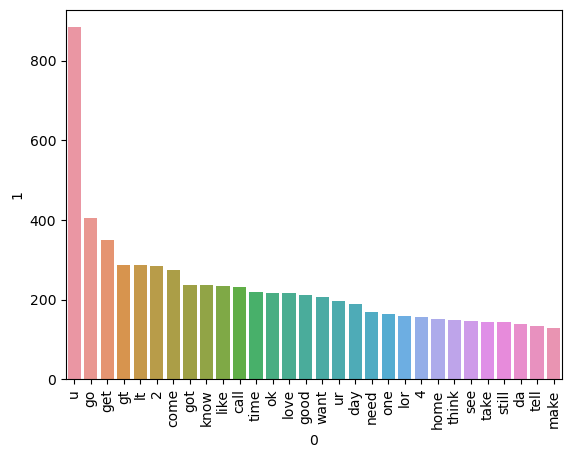

In [60]:
from collections import Counter
# Counter(ham_corpus) # creates a dictionary of information every word in ham_corpus

# Counter(ham_corpus).most_common(30) # to see the top 30 words used in ham msgs

# pd.DataFrame(Counter(ham_corpus).most_common(30))[0]

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation = 'vertical')

plt.show()

# Model Building

We'll use Naive Baye's as it works well on textual data, but we'll also use other algorithms and see which is performing better

# All ML algo needs numeric data

# Bag of Words
So we need to convert transformed_data to numeric value using Bag of words and target column is already numeric

Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

This model can be visualized using a table, which contains the count of words corresponding to the word itself.

Step #1 : We will first preprocess the data, in order to:

Convert text to lower case.
Remove all non-word characters.
Remove all punctuations.

Step #2 : Obtaining most frequent words in our text.

We will apply the following steps to generate our model.

We declare a dictionary to hold our bag of words.
Next we tokenize each sentence to words.
Now for each word in sentence, we check if the word exists in our dictionary.
If it does, then we increment its count by 1. If it doesn’t, we add it to our dictionary and set its count as 1.


Step #3 : Building the Bag of Words model
In this step we construct a vector, which would tell us whether a word in each sentence is a frequent word or not. If a word in a sentence is a frequent word, we set it as 1, else we set it as 0.

# Vectorization

What is a Vectorizer? Vectorization is the process of converting words into numbers is called Vectorization, It is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which is used to find word predictions, similarities etc.

The vectorization is used in use case like:

Text classification

Compute Similar words

Document Clustering / Grouping

Natural language Processing (NLP)

feature extraction in Text Classification.


------ Geeksforgeeks ----------
Ref link: https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
-----------------------------------------------------------------------------------------------

CountVectorizer is a great tool provided by the scikit-learn library in Python.
It is used to transform a given text into a vector on the basis of the frequency (count) of
each word that occurs in the entire text. This is helpful when we have multiple such texts,
and we wish to convert each word in each text into vectors (for using in further text analysis)
Let us consider a few sample texts from a document (each as a list element):

document = [ “One Geek helps Two Geeks”, “Two Geeks help Four Geeks”, “Each Geek helps many other
 Geeks at GeeksforGeeks.”]

CountVectorizer creates a matrix in which each unique word is represented by a column of the
matrix, and each text sample from the document is a row in the matrix. The value of each cell
 is nothing but the count of the word in that particular text sample

            at each four geek geeks geeksforgeeks help helps  many one other  two
document[0]  0  0    0    1    1          0         0    1      0   1    0     1
document[1]  0  0    1    0    2          0         1    0      0   0    0     1
document[2]  1  1    0    1    1          1         0    1      1   0    1     0

Key Observations:
1. There are 12 unique words in the document, represented as columns of the table.
2. There are 3 text samples in the document, each represented as rows of the table.
3. Every cell contains a number, that represents the count of the word in that particular text.
4. All words have been converted to lowercase.
5. The words in columns have been arranged alphabetically.


Inside CountVectorizer, these words are not stored as strings. Rather, they are given a particular index value.
 In this case, ‘at’ would have index 0, ‘each’ would have index 1, ‘four’ would have index 2 and so on.
The output comes as SPARSE MATRIX


# CountVectorizer    -    Bag of Words
Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data. Let’s take an example:

text = [‘Hello my name is james, this is my python notebook’]
The text is transformed to a "sparse matrix" as shown below.

hello    is    my    name    james    this   python    notebook
    0    2     2      1         1       1       1          1

We have 8 unique words in the text and hence 8 different columns each representing a unique word in the matrix. The row represents the word count. Since the words ‘is’ and ‘my’ were repeated twice we have the count for those particular words as 2 and 1 for the rest.
Countvectorizer makes it easy for text data to be used directly in machine learning and deep learning models such as text classification.


Let’s take another example, but this time with more than 1 input:

text = [‘Hello my name is james' , ’this is my python notebook’]
We have 2 text inputs, what happens is that each input is preprocessed, tokenized, and represented as a sparse matrix. By default, Countvectorizer converts the text to lowercase and uses word-level tokenization.

    hello    is    my    name    james    this   python    notebook
0     1       1     1      1       1        0      0          0
1     0       1     1      0       0        1      1          1

# TF- IDF

TF-IDF stands for Term Frequency — Inverse Document Frequency and is a statistic that aims to better define how important a word is for a document, while also taking into account the relation to other documents from the same corpus.

This is performed by looking at how many times a word appears into a document while also paying attention to how many times the same word appears in other documents in the corpus.

The rationale behind this is the following:

- a word that frequently appears in a document has more relevancy for that document, meaning that there is higher probability that the document is about or in relation to that specific word
- a word that frequently appears in more documents may prevent us from finding the right document in a collection; the word is relevant either for all documents or for none. Either way, it will not help us filter out a single document or a small subset of documents from the whole set.

So then TF-IDF is a score which is applied to every word in every document in our dataset. And for every word, the TF-IDF value increases with every appearance of the word in a document, but is gradually decreased with every appearance in other documents.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() # for bag of words

tf = TfidfVectorizer()# we'll try our model with TF-IDF also 

In [62]:
# Independent Feature
# we get sparse array using CountVector, so convert it to dense array
x = cv.fit_transform(df["transformed_data"]).toarray()  # bag of words

x1 = tf.fit_transform(df['transformed_data']).toarray()  # Independent Feature with TF-IDF

In [63]:
x.shape

(5169, 6708)

In [64]:
x1.shape

(5169, 6708)

In [65]:
# Dependent Feature will be same for bag of words(CountVectorizer) and TF-IDF
y=df['Target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Train Test Split

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.25, random_state=2) # for CountVectorizer

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y,test_size=0.25 , random_state = 2) # for TF-IDF

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# as we don't know data distribution so importing all Naive Bayes algo to check

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# as we know it is a imbalanced data, so accuracy is not more important but precision is very important

In [69]:
gnb  = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



gnb1  = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [70]:
# with CountVectorizer
gnb.fit(x_train, y_train)
y_predict_gnb = gnb.predict(x_test)

print("----- With CountVectorizer -----\n")
print("Performance Metrics With Gaussian Naive Bayes \n")
print("Accuracy Score : ", accuracy_score(y_test, y_predict_gnb))
print("\nConfusion Matrix :\n",confusion_matrix(y_test, y_predict_gnb))
print("\nPrecison Score : ",precision_score(y_test, y_predict_gnb))


# with TF - IDF
gnb1.fit(x1_train, y1_train)
y_pred_tfidf_gnb = gnb1.predict(x1_test)

print("\n----- With TF-IDF -----\n")
print("Performance Metrics With Gaussian Naive Bayes \n")
print("Accuracy Score : ", accuracy_score(y1_test, y_pred_tfidf_gnb))
print("\nConfusion Matrix :\n",confusion_matrix(y1_test, y_pred_tfidf_gnb))
print("\nPrecison Score : ",precision_score(y1_test, y_pred_tfidf_gnb))


# we can't observe much difference with CountVectorizer and TF-IDF using Gaussian Naive Bayes

----- With CountVectorizer -----

Performance Metrics With Gaussian Naive Bayes 

Accuracy Score :  0.8723897911832946

Confusion Matrix :
 [[991 139]
 [ 26 137]]

Precison Score :  0.4963768115942029

----- With TF-IDF -----

Performance Metrics With Gaussian Naive Bayes 

Accuracy Score :  0.8700696055684455

Confusion Matrix :
 [[992 138]
 [ 30 133]]

Precison Score :  0.4907749077490775


In [71]:
# with CountVectorizer

mnb.fit(x_train, y_train)
y_predict_mnb = mnb.predict(x_test)

print("----- With CountVectorizer -----\n")
print("Performance Metrics With Multinomial Naive Bayes \n")
print("Accuracy Score : ", accuracy_score(y_test, y_predict_mnb))
print("\nConfusion Matrix :\n",confusion_matrix(y_test, y_predict_mnb))
print("\nPrecison Score : ",precision_score(y_test, y_predict_mnb))  # better precision score than Gaussian Naive Bayes

# with TF-IDF

mnb1.fit(x1_train, y1_train)

y_pred_tfidf_mnb = mnb1.predict(x1_test)
print("\n----- With TF-IDF -----\n")
print("Performance Metrics With Multinomial Naive Bayes \n")
print("Accuracy Score : ", accuracy_score(y1_test, y_pred_tfidf_mnb))
print("\nConfusion Matrix :\n",confusion_matrix(y1_test, y_pred_tfidf_mnb))
print("\nPrecison Score : ",precision_score(y1_test, y_pred_tfidf_mnb)) 


# we can see that using TF-IDF precision score is much improved using Multinomial Naive Bayes

----- With CountVectorizer -----

Performance Metrics With Multinomial Naive Bayes 

Accuracy Score :  0.9659706109822119

Confusion Matrix :
 [[1102   28]
 [  16  147]]

Precison Score :  0.84

----- With TF-IDF -----

Performance Metrics With Multinomial Naive Bayes 

Accuracy Score :  0.9597834493426141

Confusion Matrix :
 [[1130    0]
 [  52  111]]

Precison Score :  1.0


In [114]:
mnb1

MultinomialNB()

In [116]:
test = ["I saw your presentation and it was really good"]

In [117]:
type(test)

list

In [118]:
type(df["transformed_data"][0])

str

In [120]:
test_1 = tf.transform(["I saw your presentation and it was really good"]).toarray()
test_1

array([[0., 0., 0., ..., 0., 0., 0.]])

In [122]:
mnb1.predict(test_1)

array([0])

In [73]:
bnb.fit(x_train, y_train)
y_predict_bnb = bnb.predict(x_test)

print("----- With CountVectorizer -----\n")
print("Performance Metrics With Bernoulli Naive Bayes Using CountVectorizer \n")
print("Accuracy Score : ", accuracy_score(y_test, y_predict_bnb))
print("\nConfusion Matrix :\n",confusion_matrix(y_test, y_predict_bnb))
print("\nPrecison Score : ",precision_score(y_test, y_predict_bnb))  # best precision score among all


# with TF-IDF
bnb1.fit(x1_train, y1_train)

y_pred_tfidf_bnb = bnb1.predict(x1_test)

print("----- With TF-IDF -----\n")
print("Performance Metrics With Bernoulli Naive Bayes using TF-IDF \n")
print("Accuracy Score : ", accuracy_score(y1_test, y_pred_tfidf_bnb))
print("\nConfusion Matrix :\n",confusion_matrix(y1_test, y_pred_tfidf_bnb))
print("\nPrecison Score : ",precision_score(y1_test, y_pred_tfidf_bnb)) 

----- With CountVectorizer -----

Performance Metrics With Bernoulli Naive Bayes Using CountVectorizer 

Accuracy Score :  0.9698375870069605

Confusion Matrix :
 [[1127    3]
 [  36  127]]

Precison Score :  0.9769230769230769
----- With TF-IDF -----

Performance Metrics With Bernoulli Naive Bayes using TF-IDF 

Accuracy Score :  0.9698375870069605

Confusion Matrix :
 [[1127    3]
 [  36  127]]

Precison Score :  0.9769230769230769


# Conclusion

WITH TF-IDF MULTINOMIAL NAIVE BAYES IS PERFORMING BEST AS PRECISION SCORE = 1(IN IMBALANCED DATASET PRECISION SCORE IS MORE 
                                                                              IMPORTANT THAN ACCURACY)
IT MEANS THERE IS NO FALSE POSITIVE - NO MISTAKE

# Now Choosing MultinomialNB and comparing it with few other ML algorithms

In [74]:
# pip install xgboost

In [75]:
# importing multiple ML algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
# creating objects for all ML algo 


svc = SVC(kernel = 'sigmoid',gamma = 1.0)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state=2)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear' , penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators = 50, random_state=2)
bc  = BaggingClassifier(n_estimators = 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)


In [77]:
classifiers = {
    'SVC' : svc,
    'KN' :knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'Adaboost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [78]:
def train_classifier(clf,x_train, y_train, x_test, y_test): # Count Vector (BOW) data
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test , y_predict)
    
    return accuracy, precision

In [79]:
# Checking an example of the function above with Decision Tree Classifier

print("Accuracy and Precision with Decision Tree Classifier")
train_classifier(dtc, x_train, y_train, x_test, y_test )


Accuracy and Precision with Decision Tree Classifier


(0.9288476411446249, 0.9493670886075949)

In [80]:
# pick one algo at a time, train the model and store accuracy and precision for every algo in accuracy_scores, precision_scores


accuracy_scores = []
precision_scores = []

for name, clf in classifiers.items():  # item in dictionary means key-value pair
    current_accuracy , current_precision = train_classifier(clf , x_train, y_train, x_test, y_test)
    print("For --- ", name, " ---")
    print("\nAccuracy: ",current_accuracy)
    print("\nPrecision : ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For ---  SVC  ---

Accuracy:  0.9280742459396751

Precision :  0.7364864864864865


C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For ---  KN  ---

Accuracy:  0.9110595514307811

Precision :  1.0
For ---  NB  ---

Accuracy:  0.9659706109822119

Precision :  0.84
For ---  DT  ---

Accuracy:  0.9280742459396751

Precision :  0.926829268292683
For ---  LR  ---

Accuracy:  0.9729311678267595

Precision :  0.9776119402985075
For ---  RF  ---

Accuracy:  0.9737045630317092

Precision :  1.0
For ---  Adaboost  ---

Accuracy:  0.9675174013921114

Precision :  0.9689922480620154
For ---  BgC  ---

Accuracy:  0.9644238205723125

Precision :  0.9333333333333333
For ---  ETC  ---

Accuracy:  0.9760247486465584

Precision :  0.9925373134328358
For ---  GBDT  ---

Accuracy:  0.9489559164733179

Precision :  0.9532710280373832
For ---  xgb  ---

Accuracy:  0.9706109822119103

Precision :  0.9699248120300752


In [81]:
# now converting all the above results into DataFrame

performance_df = pd.DataFrame({
                                'Algorithm_Name' : classifiers.keys() , 
                                'Accuracy'       : accuracy_scores,
                                'Precision'      : precision_scores
                              }).sort_values('Precision' , ascending = False)

performance_df

# Now we can see the performances of different ML algo according to the given dataset

,Algorithm_Name,Accuracy,Precision
1,KN,0.911060,1.000000
5,RF,0.973705,1.000000
8,ETC,0.976025,0.992537
4,LR,0.972931,0.977612
10,xgb,0.970611,0.969925
6,Adaboost,0.967517,0.968992
9,GBDT,0.948956,0.953271
7,BgC,0.964424,0.933333
3,DT,0.928074,0.926829
2,NB,0.965971,0.840000


# Now let's visualize the above thing with a graph

In [82]:
performance_df1 = pd.melt(performance_df , id_vars = 'Algorithm_Name')

performance_df1

,Algorithm_Name,variable,value
0,KN,Accuracy,0.911060
1,RF,Accuracy,0.973705
2,ETC,Accuracy,0.976025
3,LR,Accuracy,0.972931
4,xgb,Accuracy,0.970611
5,Adaboost,Accuracy,0.967517
6,GBDT,Accuracy,0.948956
7,BgC,Accuracy,0.964424
8,DT,Accuracy,0.928074
9,NB,Accuracy,0.965971


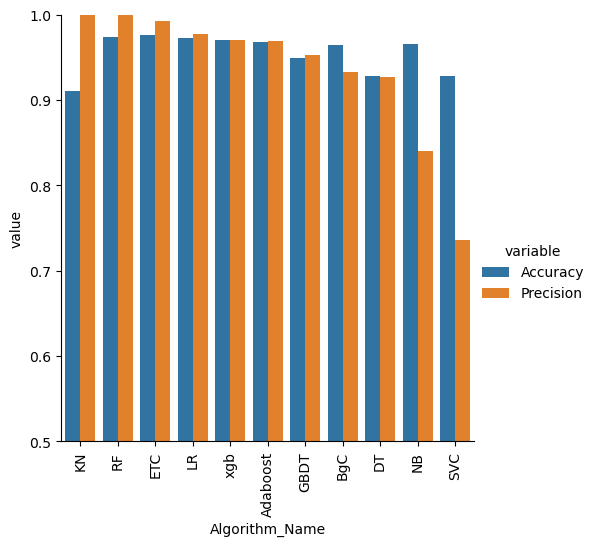

In [83]:
sns.catplot(x = 'Algorithm_Name' , y ='value', hue ='variable', data = performance_df1 , kind = 'bar' , height = 5)
plt.xticks(rotation = 'vertical')
plt.ylim(0.5,1.0)
plt.show()

# Model Improvement

- In TF-IDF : change the max_features parameter (for how many words you want to vectorize the parameter)

e.g if max_features = 1000 means we want to vectorize 1000 most frequently used words only out of total words




- We can apply scaling (StandatdScaler or MinMaxScaler)  -- not shown here, but can check in the video

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

We can't use StandardScaler to scale as it can give -ve values which won't be accepted by Naive Bayes Algorithm
Now use this x as independent feature in the model. Rest everything will be same




- We can add num_of_characters in our input   -- not shown here, but can check in the video

x = tfidf.fit_transform(df['transformed_data']).toarray()

x = np.hstack((x , df['num_of_characters'].values.reshape(-1,1)))

Now use this x as independent feature in the model. Rest everything will be same



- Use of Voting Classifier i.e. Combination of best performing models  --- shown below

In [84]:
tf2 = TfidfVectorizer(max_features= 2500) # we can see model performance with diff values of max_features

x2 = tf2.fit_transform(df['transformed_data']).toarray()  # Independent Feature with TF-IDF
y2 = df['Target'].values

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.25, random_state = 2) # for TF-IDF

gnb2  = GaussianNB()
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()

# with TF - IDF and Gaussian NB
mnb2.fit(x2_train, y2_train)
y2_pred_tfidf_mnb2 = mnb2.predict(x2_test)

print("\n----- With TF-IDF and Multinomial NB -----\n")
print("Performance Metrics With Multinomial Naive Bayes \n")
print("Accuracy Score : ", accuracy_score(y2_test, y2_pred_tfidf_mnb2))
print("\nConfusion Matrix :\n",confusion_matrix(y2_test, y2_pred_tfidf_mnb2))
print("\nPrecison Score : ",precision_score(y2_test, y2_pred_tfidf_mnb2))



----- With TF-IDF and Multinomial NB -----

Performance Metrics With Multinomial Naive Bayes 

Accuracy Score :  0.9760247486465584

Confusion Matrix :
 [[1130    0]
 [  31  132]]

Precison Score :  1.0


# Comparison with and without max_features

# without max_features
Performance Metrics With Multinomial Naive Bayes 

Accuracy Score :  0.9597834493426141

Confusion Matrix :
 [[1130    0]
 [  52  111]]

Precison Score :  1.0


# with max_features
Performance Metrics With Multinomial Naive Bayes 

Accuracy Score :  0.9760247486465584

Confusion Matrix :
 [[1130    0]
 [  31  132]]

Precison Score :  1.0

# we can clearly see that precision in both cases is 1 but accuracy is improved in the case of max_features = 2500

In [85]:
# Now let's put x2_train, y2_train in all the other algorithms and see the change in performance metrics with max_features used

In [86]:
tf2 = TfidfVectorizer(max_features= 2500) # we can see model performance with diff values of max_features

x2 = tf2.fit_transform(df['transformed_data']).toarray()  # Independent Feature with TF-IDF
y2 = df['Target'].values

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.25, random_state = 2) # for TF-IDF


def train_classifier(clf,x_train, y_train, x_test, y_test):
    clf.fit(x2_train, y2_train)
    y2_predict = clf.predict(x2_test)
    accuracy = accuracy_score(y2_test, y2_predict)
    precision = precision_score(y2_test , y2_predict)
    
    return accuracy, precision


accuracy_scores2 = []
precision_scores2 = []

for name, clf in classifiers.items():  # item in dictionary means key-value pair
    current_accuracy , current_precision = train_classifier(clf , x2_train, y2_train, x2_test, y2_test)
    print("For --- ", name, " ---")
    print("\nAccuracy: ",current_accuracy)
    print("\nPrecision : ", current_precision)
    print("\n")
    
    accuracy_scores2.append(current_accuracy)
    precision_scores2.append(current_precision)

For ---  SVC  ---

Accuracy:  0.9729311678267595

Precision :  0.9705882352941176




C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For ---  KN  ---

Accuracy:  0.9102861562258314

Precision :  1.0


For ---  NB  ---

Accuracy:  0.9760247486465584

Precision :  1.0


For ---  DT  ---

Accuracy:  0.9327146171693735

Precision :  0.8333333333333334


For ---  LR  ---

Accuracy:  0.9582366589327146

Precision :  0.9658119658119658


For ---  RF  ---

Accuracy:  0.9775715390564579

Precision :  0.9926470588235294


For ---  Adaboost  ---

Accuracy:  0.9605568445475638

Precision :  0.9516129032258065


For ---  BgC  ---

Accuracy:  0.9566898685228151

Precision :  0.8590604026845637


For ---  ETC  ---

Accuracy:  0.979891724671307

Precision :  0.9790209790209791


For ---  GBDT  ---

Accuracy:  0.951276102088167

Precision :  0.9385964912280702


For ---  xgb  ---

Accuracy:  0.9682907965970611

Precision :  0.9552238805970149




In [87]:
new_df = pd.DataFrame({'Algorithm_Name'         : classifiers.keys(),
                       'Accuracy_max_ft-2500'  : accuracy_scores2,
                       'Precision_max_ft-2500' : precision_scores2
                      })

new_df

# new output of all ML models i.e. with max_features


,Algorithm_Name,Accuracy_max_ft-2500,Precision_max_ft-2500
0,SVC,0.972931,0.970588
1,KN,0.910286,1.000000
2,NB,0.976025,1.000000
3,DT,0.932715,0.833333
4,LR,0.958237,0.965812
5,RF,0.977572,0.992647
6,Adaboost,0.960557,0.951613
7,BgC,0.956690,0.859060
8,ETC,0.979892,0.979021
9,GBDT,0.951276,0.938596


In [88]:
# Old output of all ML models i.e. without max_features

performance_df

,Algorithm_Name,Accuracy,Precision
1,KN,0.911060,1.000000
5,RF,0.973705,1.000000
8,ETC,0.976025,0.992537
4,LR,0.972931,0.977612
10,xgb,0.970611,0.969925
6,Adaboost,0.967517,0.968992
9,GBDT,0.948956,0.953271
7,BgC,0.964424,0.933333
3,DT,0.928074,0.926829
2,NB,0.965971,0.840000


In [89]:
performance_df.merge(new_df, on = 'Algorithm_Name')

# through this we can compare the performance of all ML models with and without max_features

# we can see that in Naive Bayes Accuracy is improved using max_features and precision came to 1

,Algorithm_Name,Accuracy,Precision,Accuracy_max_ft-2500,Precision_max_ft-2500
0,KN,0.911060,1.000000,0.910286,1.000000
1,RF,0.973705,1.000000,0.977572,0.992647
2,ETC,0.976025,0.992537,0.979892,0.979021
3,LR,0.972931,0.977612,0.958237,0.965812
4,xgb,0.970611,0.969925,0.968291,0.955224
5,Adaboost,0.967517,0.968992,0.960557,0.951613
6,GBDT,0.948956,0.953271,0.951276,0.938596
7,BgC,0.964424,0.933333,0.956690,0.859060
8,DT,0.928074,0.926829,0.932715,0.833333
9,NB,0.965971,0.840000,0.976025,1.000000


# Here we observe that among all Naive Bayes with max_features is performing best
Accuracy = 97 %
Precision = 100 %

# VotingClassifier -- Model Improvement technique

# combining multiple models 

In [90]:
# Here we are choosing SVC, MNB, ETC to combine and compare the output


# creating modelss
svc = SVC(kernel = 'sigmoid',gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state=2)

In [91]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('svm', svc) , ('nb' , mnb) , ('et' , etc)] , voting = 'soft') # all 3 will be having equal weightage

voting.fit(x_train, y_train) # inputs which were used initially without max_features or scaling or anything

y_predict_voting = voting.predict(x_test)

print("Performance metrics using Voting Classifier: \n")
print("Accuracy Score: ",accuracy_score(y_test, y_predict_voting))
print("\nPrecision Score: ",precision_score(y_test, y_predict_voting))


# we can't see better results using VotingClassifier

Performance metrics using Voting Classifier: 

Accuracy Score:  0.9814385150812065

Precision Score:  0.9664429530201343


# Stacking -  similar to VotingClassifier but the models used have diff weightage using final_estimator

In [92]:
# Applying Stacking

estimator = [('svm', svc) , ('nb' , mnb) , ('et' , etc)]
final_estimator_ = RandomForestClassifier() # we are using RandomForestClassifier to decide weightage randomly

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators = estimator , final_estimator = final_estimator_)

clf.fit(x_train, y_train)

y_predict_stacking = clf.predict(x_test)

print("Performance metrics using Stacking Classifier: \n")
print("Accuracy Score: ",accuracy_score(y_test, y_predict_stacking))
print("\nPrecision Score: ",precision_score(y_test, y_predict_stacking))


# we can't see better results using VotingClassifier

Performance metrics using Stacking Classifier: 

Accuracy Score:  0.9822119102861562

Precision Score:  0.9605263157894737


# There are multiple more things to improve model
# We may try


# Till here we can conlude to use Multinomial Naive Bayes Model using max_features as it's Accuracy and Precision are best among all

# Now we'll create a pipeline and convert it into a website

# All that we have done 

- Text Preprocessing -  transform_text - returns text after applying all the preprocessing (lemmitization, stopwords, lowercase and all)

- Vectorize

- Apply Algorithms

# Pickling

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

Pickling is used to store python objects. This means things like lists, dictionaries, class objects, and more.

- Generally, you will find pickling to be most useful with data analysis, where you are performing routine tasks on the data, such as **pre-processing**. Also, it makes a lot of sense when you are working with Python-specific data types, such as dictionaries.
This is so that, every time we want to use it, we do not need to constantly re-train it, which takes more time. Instead, we just train the algorithm once, store it to a variable (an object), and then we pickle it. In the case of the NLTK module(for example), generating the classifiers every time was taking 5-15+ minutes. With pickle, it was taking about 5 seconds.
If you have a large dataset, for example, and you are loading that massive data set into memory every time you run the program, it may make a lot of sense to just pickle it, and then load that instead, because it will be far faster, again by 50 - 100x, sometimes far more depending on the size.

In [123]:
import pickle 
pickle.dump(tf, open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb1,   open('model.pkl'      , 'wb'))

In [93]:
#joblib